In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

In [17]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [18]:
df['Date']=pd.to_datetime(df['Date'])

In [19]:
df.isna().sum().sum()

0

In [20]:
df.duplicated().sum()

0

In [21]:
df.describe(include='object')

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB


In [28]:
daily_sales=df.groupby('Date').agg({
    'Revenue':'sum',
    'Units Sold':'sum',
    'Units Returned':'sum'

}).reset_index()

In [29]:
daily_sales

,Date,Revenue,Units Sold,Units Returned
0,2020-01-06,71848.56,2406,19
1,2020-01-13,72416.18,2374,27
2,2020-01-20,76152.42,2370,26
3,2020-01-27,70306.73,2397,29
4,2020-02-03,98011.64,2384,34
...,...,...,...,...
269,2025-03-03,66065.44,2431,36
270,2025-03-10,92509.57,2411,30
271,2025-03-17,65590.53,2381,22
272,2025-03-24,69778.44,2416,27


<Axes: >

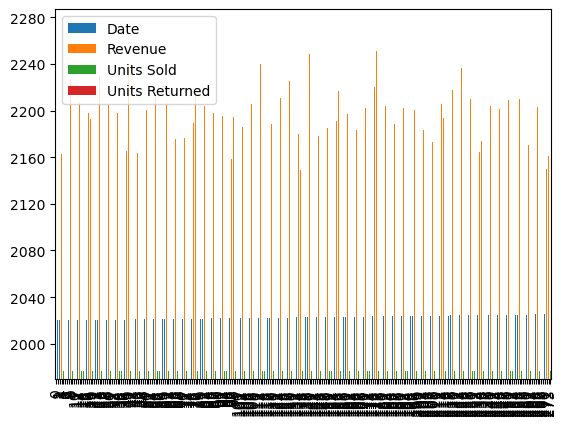

In [30]:
daily_sales.plot(kind='bar')

In [33]:
daily=df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

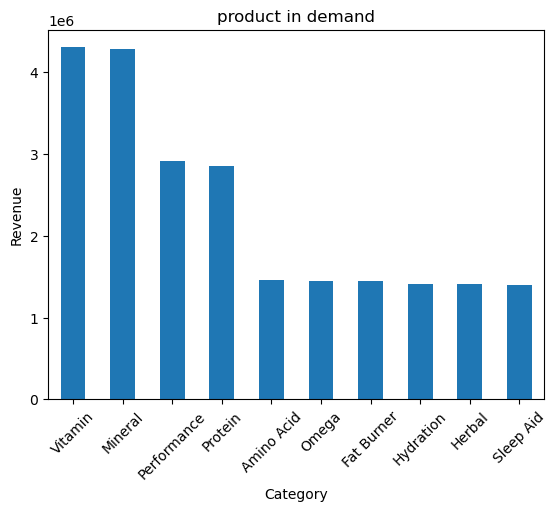

In [39]:
daily.plot(kind='bar')
plt.title('product in demand')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

In [60]:
loc_platform=df.groupby(['Location','Platform'])['Revenue'].sum().unstack().fillna(0)

In [61]:
loc_platform

Platform,Amazon,Walmart,iHerb
Location,,,
Canada,2613844.28,2518639.07,2716096.38
UK,2442671.23,2637066.25,2624222.86
USA,2612936.27,2232862.30,2514941.81


<Axes: xlabel='Location'>

<Figure size 2000x1000 with 0 Axes>

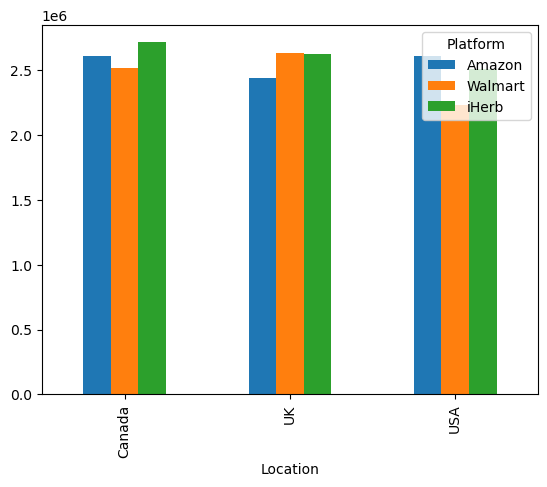

In [62]:
plt.figure(figsize=(20,10))
loc_platform.plot(kind='bar')

In [68]:
top_product=df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)

<Axes: xlabel='Product Name'>

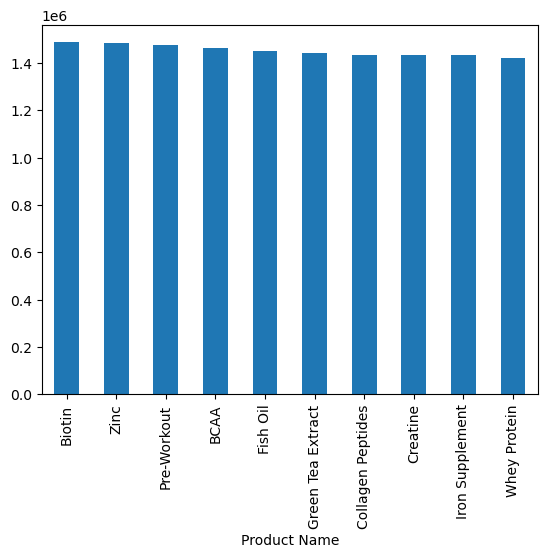

In [69]:
top_product.plot(kind='bar')

In [70]:
df['Return Rate']=df['Units Returned']/df['Units Sold']

In [73]:
category_return_rate = df.groupby("Category")['Return Rate'].mean().sort_values(ascending=False)

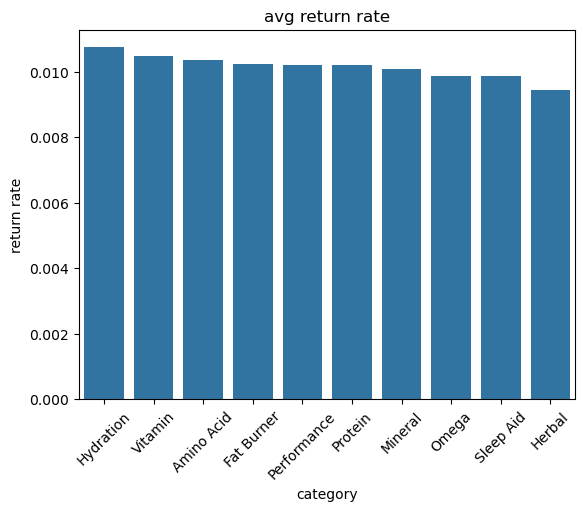

In [75]:
sns.barplot(x=category_return_rate.index,y=category_return_rate.values)
plt.title('avg return rate')
plt.ylabel('return rate')
plt.xlabel('category')
plt.xticks(rotation=45)
plt.show()

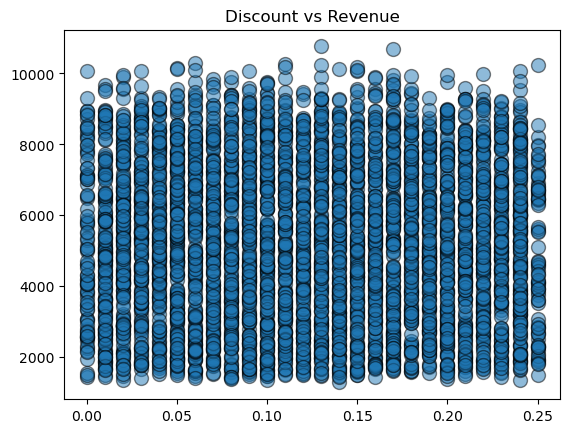

In [81]:
plt.scatter(data=df ,x='Discount',y='Revenue' ,s=100, alpha=0.5, edgecolors='black', marker='o')
plt.title('Discount vs Revenue')
plt.show()

In [82]:
corr=df[['Units Sold','Price','Revenue','Discount','Units Returned']].corr()

In [83]:
corr

,Units Sold,Price,Revenue,Discount,Units Returned
Units Sold,1.000000,0.013749,0.210462,-0.010435,0.116523
Price,0.013749,1.000000,0.977198,-0.008668,-0.010410
Revenue,0.210462,0.977198,1.000000,-0.012531,0.012432
Discount,-0.010435,-0.008668,-0.012531,1.000000,0.004276
Units Returned,0.116523,-0.010410,0.012432,0.004276,1.000000


<Axes: >

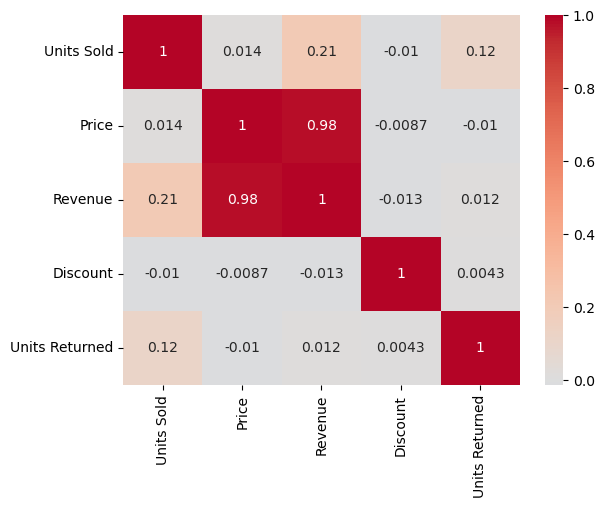

In [86]:
sns.heatmap(corr,annot=True,cmap='coolwarm',center=0)

In [87]:
fig=px.line(df,x='Date',y='Revenue',color='Category',title='Revenue Over Time')
fig.show()

In [100]:
df['Monthly']=df['Date'].dt.to_period('M')
month=df.groupby('Monthly').agg({
    'Revenue':'sum',
    'Discount':'mean',
    'Units Sold':'sum',
    'Units Returned':'sum'
}).reset_index()

In [101]:
month['Monthly']

0     2020-01
1     2020-02
2     2020-03
3     2020-04
4     2020-05
       ...   
58    2024-11
59    2024-12
60    2025-01
61    2025-02
62    2025-03
Name: Monthly, Length: 63, dtype: period[M]

In [102]:
month['Monthly']=month['Monthly'].astype(str)

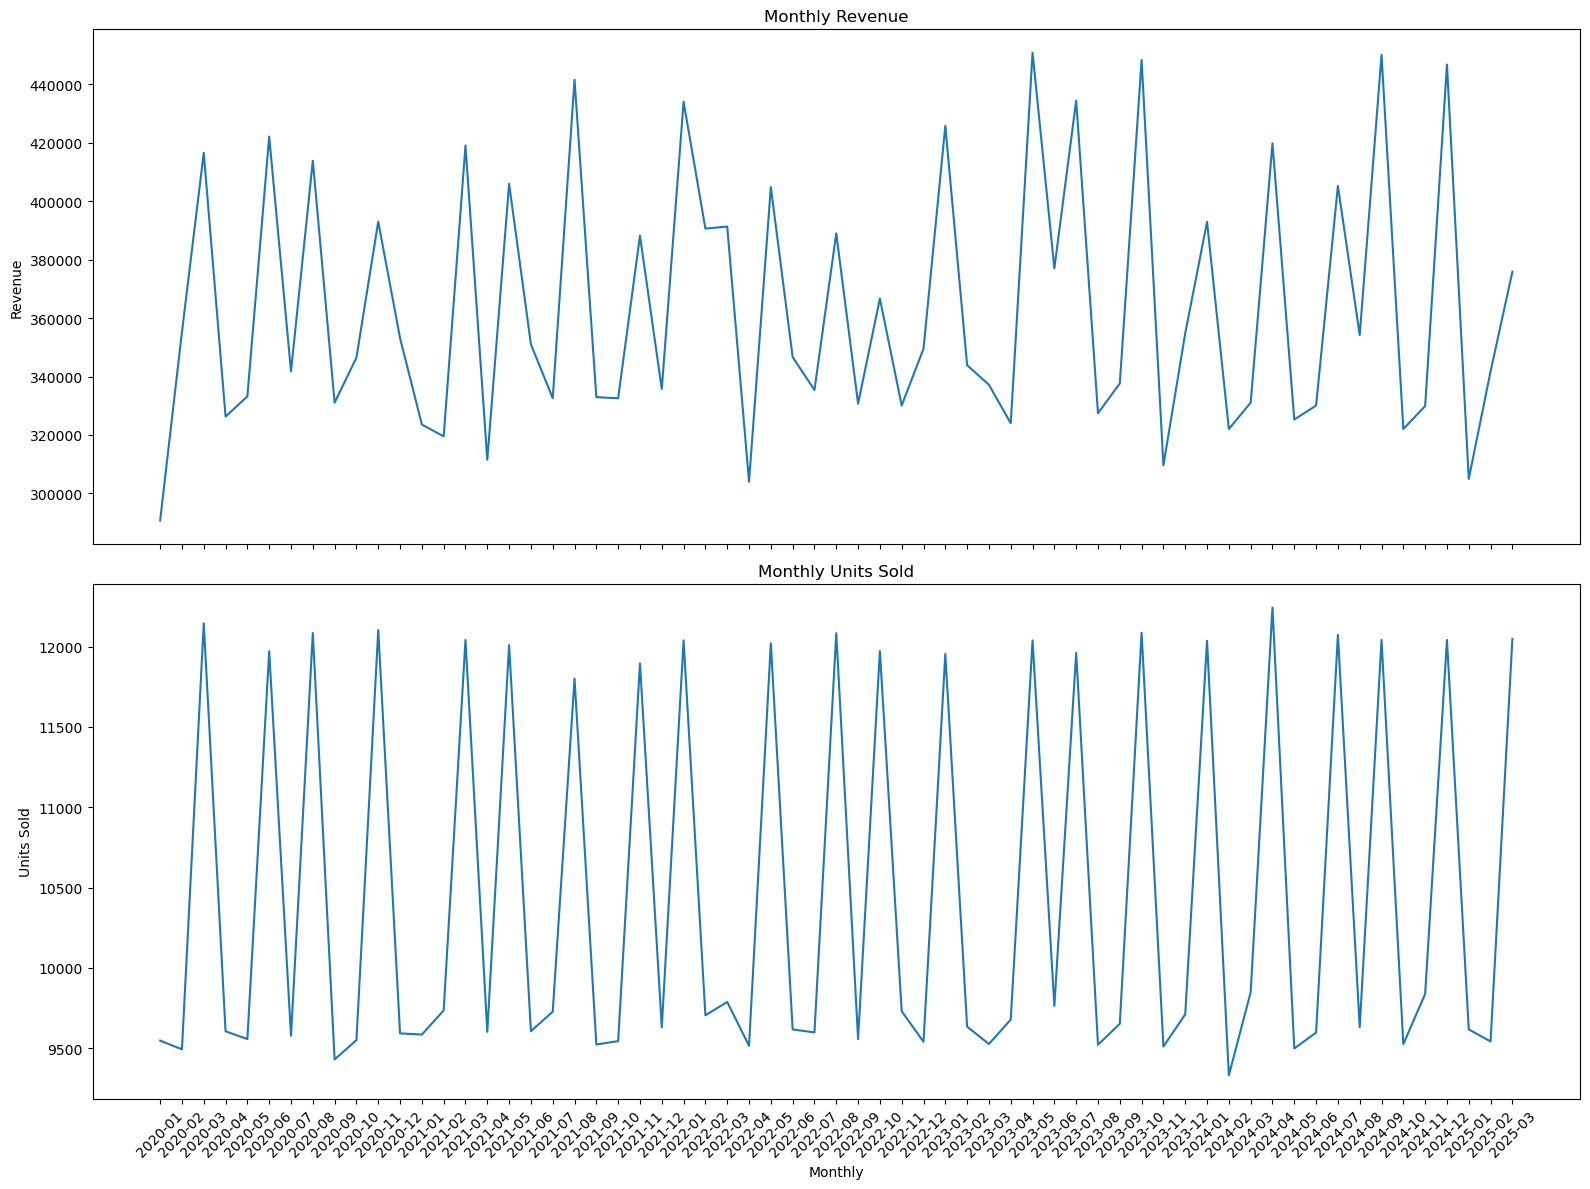

In [103]:
fig, axes =plt.subplots(2,1, sharex=True,figsize=(16,12))
sns.lineplot(data=month,x='Monthly',y='Revenue',ax=axes[0])
axes[0].set_title("Monthly Revenue")
axes[0].tick_params(axis='x',rotation=45)

sns.lineplot(data=month,x='Monthly',y='Units Sold',ax=axes[1])
axes[1].set_title("Monthly Units Sold")
axes[1].tick_params(axis='x',rotation=45)
plt.tight_layout()
plt.show()


In [104]:
df['Net Revenue']=df['Revenue']-(df['Units Returned']*df['Price'])

In [105]:
net_category=df.groupby('Category')['Net Revenue'].sum().sort_values(ascending=False)

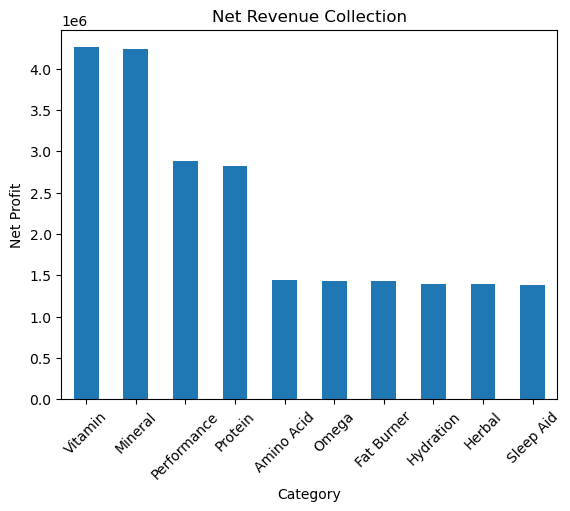

In [108]:
net_category.plot(kind='bar')
plt.title('Net Revenue Collection')
plt.ylabel('Net Profit')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()